The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


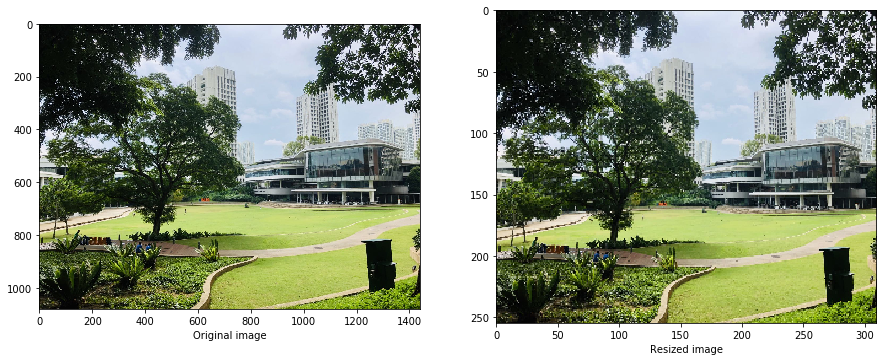

In [2]:
# additional resize test with utown.jpg
%load_ext autoreload
%autoreload 2
import sys
import matplotlib.pyplot as plt
from transform import *

plt.rcParams['figure.figsize'] = (15.0, 15.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

image = load_image('inputs/utown.jpg')
image_resize = cs4243_resize(image, 310, 255)

plt.subplot(121)
plt.imshow(image)
plt.xlabel('Original image')
plt.subplot(122)
plt.imshow(image_resize)
plt.xlabel('Resized image')
plt.show()

image_resize_sample_file = 'output/test_samples/image_resize_sample_ut.npy'
image_resize_sample = np.load(image_resize_sample_file)
assert np.max(np.abs(image_resize_sample - image_resize)) < 1e-10, "Your solution is incorrect."

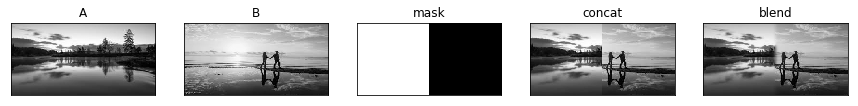

In [3]:
# additional test for blend
from transform import *
import matplotlib.pyplot as plt
from matplotlib import gridspec
plt.rcParams['figure.figsize'] = (15.0, 15.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

left = load_image('inputs/left_1.jpg')
right = load_image('inputs/right_1.jpg')
height, width = 256, 512
left_resize = cs4243_resize(left, width, height)
right_resize = cs4243_resize(right, width, height)
A = cs4243_rgb2grey(left_resize)
B = cs4243_rgb2grey(right_resize)

mask = np.zeros_like(A)
mask[:, :width//2]=1
#linear combination
left_right = A*mask + B*(1.0-mask)

blend_image = cs4243_Lap_blend(A, B, mask)

image = [A, B, mask, left_right, blend_image]
title = ['A', 'B', 'mask', 'concat', 'blend']
for i in range(5):
    ind = 151+i
    plt.subplot(ind)
    plt.imshow(image[i])
    plt.xticks([])
    plt.yticks([])
    plt.title(title[i])

plt.show()

blend_image_file = 'output/test_samples/blend_image_1.npy'
# If you are using Mac, uncommont the line below to use reference output on Mac
# blend_image_file = 'output/blend_image_mac.npy'
blend_image_sample = np.load(blend_image_file)
assert np.max(np.abs(blend_image_sample - blend_image)) < 1e-10, "Your solution is incorrect."